<h1> TELCO Churn: </h1>
<hr>
<h2>Leveraging our Data to Retain Customers<h2/>
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<img src="https://anthillonline.com/wp-content/uploads/2018/07/customer-retention.jpg" style="vertical-align:bottom">

## Project Outline
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

### 1. Acquire, prepare and clean TELCO data set.

- Split into train, validate, test sets.
- create an encoded data set for modeling, and retain an unencoded set for EDA. 
<br>

### 2. Perform Exploratory Data Analysis on the unencoded data set

- explore/demonstrate variable relationships graphically
- set null and alternate hypotheses to reject/fail to reject
- run statistical testing on related variables/variables of interest driving churn
- document takeaways
        
### 3. Modeling:

- demonstrate 3 models
- Pick highest performing models to run on validate set
- Run the highest performing model on the test data
- document takeaways and conclusion
- produce a predictions CSV to predict customer churn
    
### 4. Recommendations:

- document takeaways and conclusion

## EXSUM and The Big Picture: 
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<h2>Business Goals</h2>

<h3> Why are customers churning?</h3>
- because of price and payment pressures in 3 specific areas: monthly contracts, e-check payments, and fiber optic internet plans.

<h3> Who will churn? </h3>
- many customers are at risk of churning, but the risk is significantly higher for monthly contract, fiber optic customers paying by e-check.

<h3> Next steps </h3>
<h4> 1. Retain existing high risk-of-churn customers </h4>
 - 5% reduction in price for monthly fiber plans
    
<h4> 2. Convert existing monthly customers into 1- and 2- year customers </h4>
 - 1 free month of service for conversion to 1 yr plans, 2 months for 2 yr plans
    
<h4>3. Automate bill pay to eliminate the pain of paying </h4>
 - 10% reduction in monthly bill for 6 months for signing up with valid autopay method of payment
    
<h3>Predicted outcomes</h3>
<h4> 1. Retain 50% more customers through the crucial first 6 months </h4>
 - +900-1100 customers no longer churning
    
<h4> 2. Cut lost revenue by 33%, customer acquisition by 50% </h4>
 - CA down to 280k, from 560k annually
    
<h4> 3. Loss leader promos will result in lost revenue, but retain customers in the long term </h4>
 - $33k/QTR + $272k + $114k  = $419k over 2 QTRs

## 1. Acquire/Prep/Clean/Split 
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)

import acquire
import prepare
import split

In [2]:
#acquire the data
df = acquire.get_telco_data()
df = prepare.prep_telco(df)

In [3]:
# create an encoded df for modeling
encoded_df = prepare.encode_telco(df)

In [4]:
#Now split for exploratory data analysis (unencoded dataframe), and modeling (encoded dataframe)

In [5]:
train, validate, test = split.train_validate_test_split(df, 'churn')

In [6]:
encoded_train, encoded_validate, encoded_test = split.train_validate_test_split(encoded_df, "churn_Yes")

## 2. Exploratory Data Analysis
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

### Variable relationships to explore:

    1. Churn: Payment Type (Cat/Cat)
    2. Churn: Total Charges (Cat/Cont)
    3. Churn: Monthly Charges (Cat/Cont)
    4. Churn: Dependents (Cat/Cat)
    5. Churn: Senior Citizen (Cat/Cat)
    6. Churn: Tenure (Cat/Cont)
    7. Churn: Gender (Cat/Cat)
    8. Churn: Internet Service (Cat/Cat)
    9. Churn: Contract Type

In [7]:
# Visualize distributions for quantitative columns
#QUANT COLS
quant_col = train.select_dtypes(['int64', 'float64']).columns
#interesting_quant_cols
key_quant_cols = ['tenure', 'monthly_charges', 'total_charges']

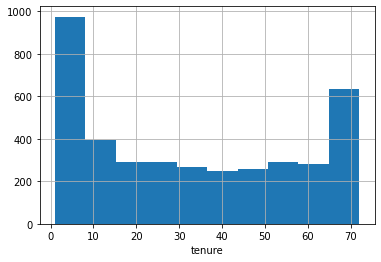

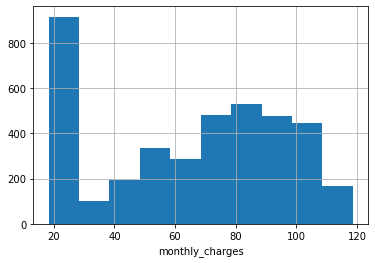

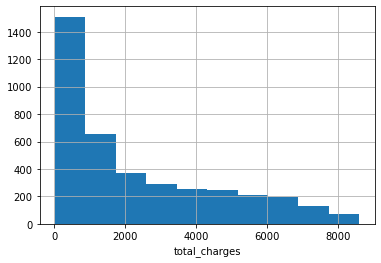

In [8]:
for col in key_quant_cols:
    train[col].hist()
    plt.xlabel(col)
    plt.show()

In [9]:
# Visualize distributions for categorical columns
#CAT COLS
cat_col = train.select_dtypes(['object']).columns
#interesting_cat_cols
key_cat_cols = ['churn', 'contract_type', 'payment_type', 'internet_service_type']

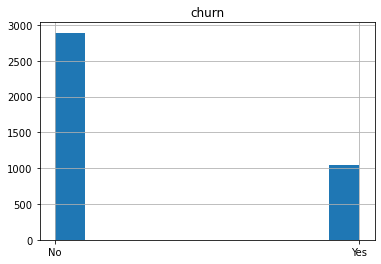

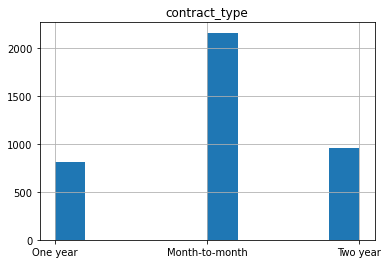

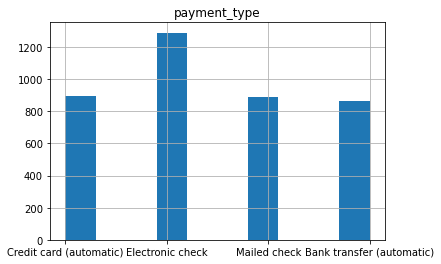

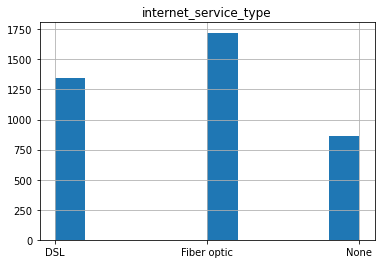

In [10]:
for col in key_cat_cols:
    train[col].hist()
    plt.title(col)
    plt.show()

## Univariate Stats Key Takeaways:

<div class="alert alert-block alert-warning"> 


<b>CATEGORICAL DATA</b> 
    <br>
 - <b>tenure</b>: most common is 0 months and 70 months >> influx due to a campaign?
    <br>
 - <b>monthly charges</b>: most common is 20 dollars, then an approx normal dist from 30-120
    <br>
 - <b>total charges</b>: 0 is the most common, suggesting influx of new customers
 
 
<b>QUANTITATIVE DATA<b>
    <br>
 - <b>churn</b> is about 25% of customers
 - <b>e-check</b> is the most popular payment type
 - <b>month-to-month contracts are more popular than one- and two-year contracts combined</b>
 - <b>fiber optic is the most popular internet service type<b>
    
</div>

In [11]:
# convert the train.churn data into binary
train.churn = train.churn.map({'No': 0, 'Yes': 1 })

***

<div class="alert alert-block alert-success">

<b>Q1.</b> Are internet customers churning at significantly different rates? 
    
</div>


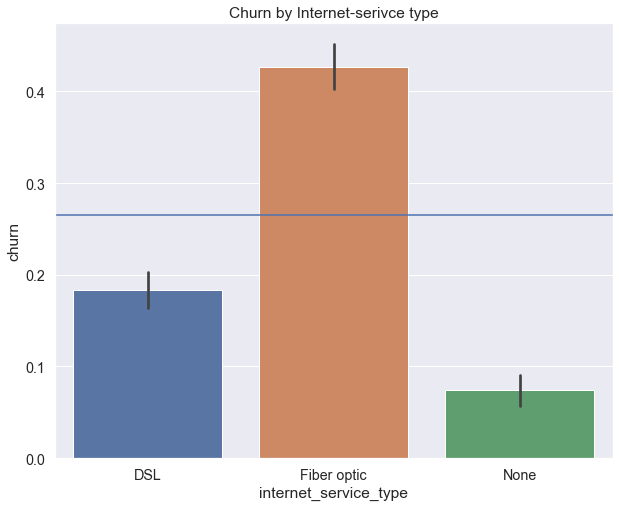

In [12]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.3)
plt.title("Churn by Internet-serivce type")
sns.barplot(x=train.internet_service_type, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")

<div class="alert alert-block alert-warning"> 
    
<b>Takeaway:</b>
    
- Fiber Optic customers have a significantly higher churn rate than other internet customers. Let's investigate Fiber Optic customers in more detail later.
    
</div>

***

<div class="alert alert-block alert-success">

<b>Q2.</b> Is payment type driving churn?
    
</div>

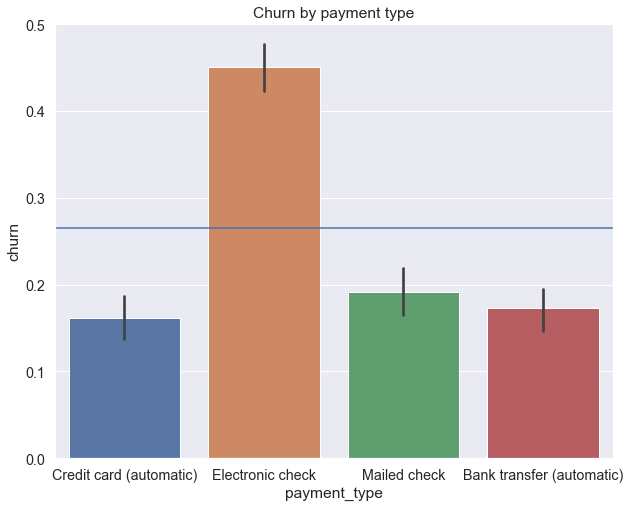

In [13]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.3)
plt.title("Churn by payment type")
sns.barplot(x=train.payment_type, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")


<div class="alert alert-block alert-warning"> 

<b>Takeaway:</b> 
- E-check customers are churning at a much higher rate than the average customer. Let's investigate E-check customers in more detail later.
    
</div>

***

<div class="alert alert-block alert-success">

<b>Q3.</b> Is contract type influencing churn at significantly different rates?
    
</div>

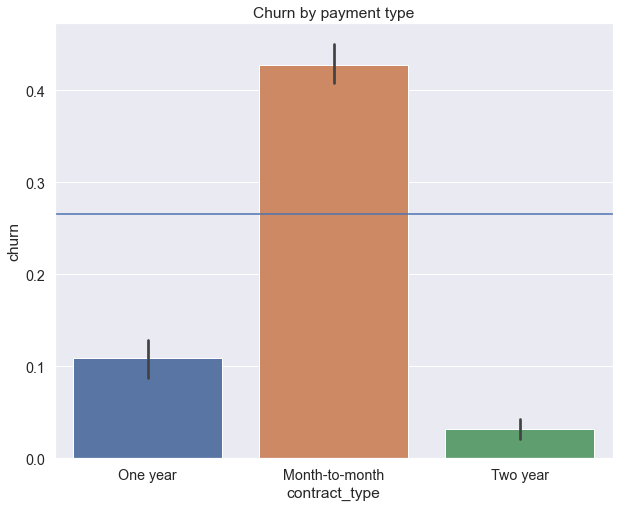

In [14]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.3)
plt.title("Churn by payment type")
sns.barplot(x=train.contract_type, y=train.churn, data=train)
pop_churn_rate = train.churn.mean()
plt.axhline(pop_churn_rate, label="Population Churn Rate")

<div class="alert alert-block alert-warning">

<b> Takeaway: </b>
- Monthly contract customers are churning at much higher rates than customers with longer term plans. Let's investigate Monthly customers in more detail later.
    
</div>

***

<div class="alert alert-block alert-success">
    <b>Q4.</b> How does average tenure vary by payment type?    
</div>

Text(0.5, 1.0, 'Tenure by payment type')

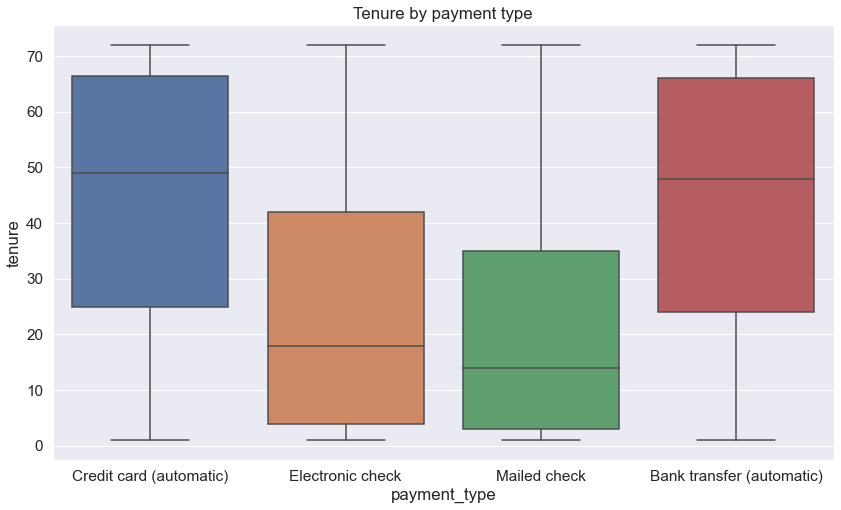

In [15]:
plt.figure(figsize=(14,8))
sns.set(font_scale = 1.4)
sns.boxplot(x=train.payment_type, y=train.tenure, data=train)
plt.title("Tenure by payment type")

<div class="alert alert-block alert-warning">
    <b>Takeaway:</b> 
- E-check and Mailed check have the lowest mean tenure, but prior viz confirms that only E-check customers are churning at significantly higher than average rates (>21%)
</div>

***

<div class="alert alert-block alert-success">
<b>Let's look at some interesting sub-groups with high churn, and create subsets to plot and visualize their elevated churn rates.</b>
</div>

group 1: control (mean population churn)

group 2: customers paying by electronic check

group 3: customers paying by electronic check and consuming fiber optic internet

group 4: customers paying by electronic check and consuming fiber optic internet with monthly contracts

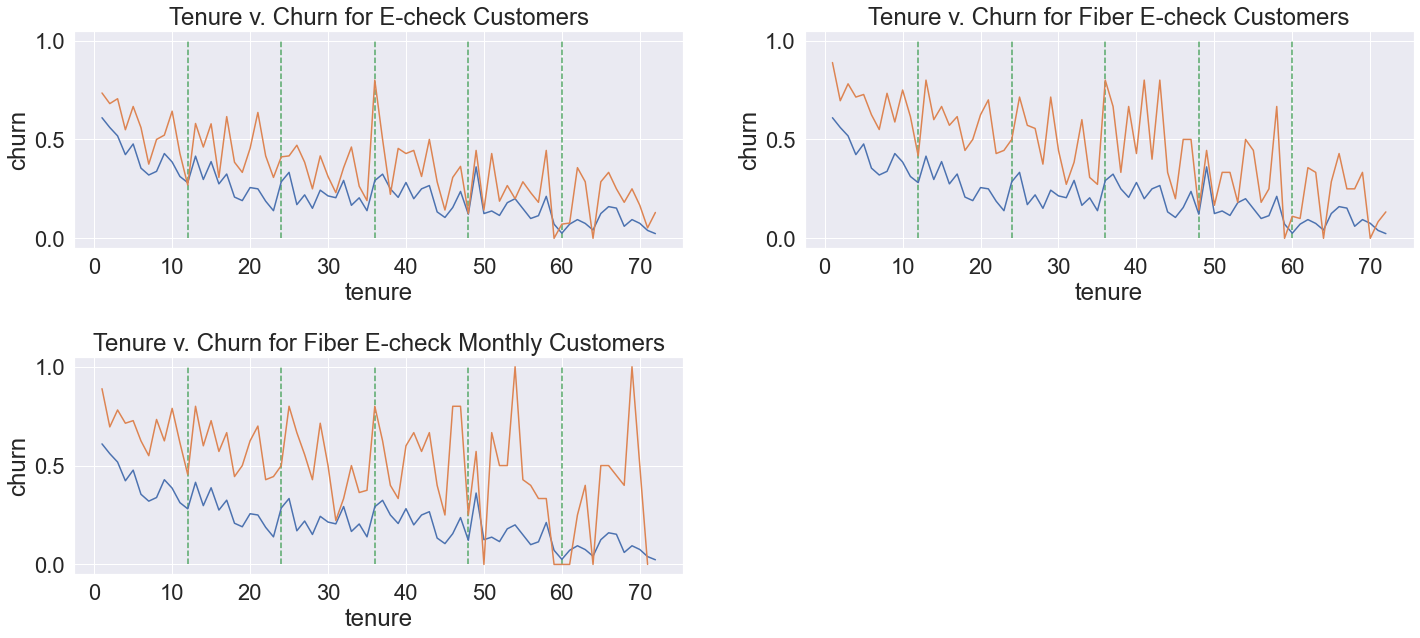

In [16]:
# Average churn in the population, by tenure
y1 = train.churn
# population churn for fiber optic, electronic check customers
y2 = train.churn[(train.payment_type == 'Electronic check')]
y3 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic')]
y4 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic') & (train.contract_type == 'Month-to-month')]
x1 = train.tenure



plt.figure(figsize=(24,10))
sns.set(font_scale = 2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

plt.subplot(221)
plt.title("Tenure v. Churn for E-check Customers")
sns.lineplot(x=x1, y=y1, data=train, ci=None)
sns.lineplot(x=x1, y=y2, data=train, ci=None)
plt.vlines(x=[12, 24, 36, 48, 60], ymin=0, ymax=1, colors='g', linestyles='dashed')

plt.subplot(222)
plt.title("Tenure v. Churn for Fiber E-check Customers")
sns.lineplot(x=x1, y=y1, data=train, ci=None)
sns.lineplot(x=x1, y=y3, data=train, ci=None)
plt.vlines(x=[12, 24, 36, 48, 60], ymin=0, ymax=1, colors='g', linestyles='dashed')

plt.subplot(223)
plt.title("Tenure v. Churn for Fiber E-check Monthly Customers")
sns.lineplot(x=x1, y=y1, data=train, ci=None)
sns.lineplot(x=x1, y=y4, data=train, ci=None)
plt.vlines(x=[12, 24, 36, 48, 60], ymin=0, ymax=1, colors='g', linestyles='dashed')





<div class="alert alert-block alert-warning">
    <b>Takeaways:</b>
<br>
1. E-check customers consistently exceed the baseline of average TELCO churn, especially at 10, 20 and 36 months. At 36 months, the value of churn for this subset is approx 80%.
<br>
<br>
2. Adding the fiber as a subset increases churn even further above the baseline of 26%, with churn peaking at 13, 36, 42 and 44 months. Average churn rate for this subset is above 50% for the first 48 months of tenure - meaning roughly half of this type of customer are leaving every month.
<br>
<br>
3. Adding in the Monthly contract dimension leads to higher spikes (more volatility), and several points of 100% churn for this customer base at 55 and 68 months. Churn drops dramatically after those periods, because there are litle to no customers in that subcategory that remain with TELCO as continuing customers.
</div>

In [17]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare group membership, and test if there is a significant rel. b/w churn and other var.

y2 = train.churn[(train.payment_type == 'Electronic check')]
y3 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic')]
y4 = train.churn[(train.payment_type == 'Electronic check') & (train.internet_service_type == 'Fiber optic') & (train.contract_type == 'Month-to-month')]


In [18]:
#set the significance level to 5%
alpha = 0.05

In [19]:
null_hypothesis1 = "churn and payment by e-check are independent"
alternative_hypothesis1 = "there is a relationship between churn and payment by e-check"

null_hypothesis2 = "churn and payment by e-check among fiber optic customers are independent"
alternative_hypothesis2 = "there is a relationship between churn and payment by e-check among fiber optic customers are independent"

null_hypothesis3 = "churn and payment by e-check among monthly fiber optic customers are independent"
alternative_hypothesis3 = "there is a relationship between churn and payment by e-check among monthly fiber optic customers are independent"

In [20]:
# Setup a crosstab of observed churn to payment type
observed1 = pd.crosstab(train.churn, y2)
observed2 = pd.crosstab(train.churn, y3) 
observed3 = pd.crosstab(train.churn, y4)

In [21]:
chi2, p1, degf, expected = stats.chi2_contingency(observed1)
chi2, p2, degf, expected = stats.chi2_contingency(observed2)
chi2, p3, degf, expected = stats.chi2_contingency(observed3)                                                                                                                

if p1 < alpha:
    print("Reject the null hypothesis that", null_hypothesis1)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis1)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"-> P is equal to: {p1}")
print('___________________________________________________________________________________________________________')
                                                                                                                
if p2 < alpha:
    print("Reject the null hypothesis that", null_hypothesis2)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis2)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"-> P is equal to: {p2}") 
print('___________________________________________________________________________________________________________')
                                                                                                                
if p3 < alpha:
    print("Reject the null hypothesis that", null_hypothesis3)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis3)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

print(f"-> P is equal to: {p3}")                                                                                                               

Reject the null hypothesis that churn and payment by e-check are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment by e-check
-> P is equal to: 2.0930513520711647e-281
___________________________________________________________________________________________________________
Reject the null hypothesis that churn and payment by e-check among fiber optic customers are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment by e-check among fiber optic customers are independent
-> P is equal to: 1.3421200882993038e-188
___________________________________________________________________________________________________________
Reject the null hypothesis that churn and payment by e-check among monthly fiber optic customers are independent
Sufficient evidence to move forward understanding that there is a relationship between churn and payment by e-check among monthly

<div class="alert alert-block alert-warning">
    <b>Bivariate STATS Takeaways:</b>
<br>
<br>
   1. I have identified payment type (e-check), contract type (monthly), and internet service type (fiber) as the primary drivers of churn among departng customers.
<br>
<br>
   2. I produced visuals (bar charts for simple averages, box chart for tenure, and line charts for continuous variables) to show correlation between related variables.
<br>
<br>
   3. I tested for overlapping group membership with Chi2 tests for the most apparently connected variables in subsets.
<br>
<br>
**I can confidently say that payment type, contact type, and internet service type are drivers of churn in the identified categories (fiber, e-check, monthly contract)**
</div>

<h1>3. Modeling</h1>
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

1. Decision Tree Model
2. Random Forest Model
3. Logistic Regression Model

<div class="alert alert-block alert-success"> 
    <b>Note</b>: What is the baseline prediction for customer churn?<br>
    <b> Answer:</b> 73%    
</div>

In [22]:
## the baseline prediction is the modal outcome:
churn_odds = encoded_train.churn_Yes.mean()
non_churn_odds = (1 - churn_odds)

In [23]:
if non_churn_odds > churn_odds:
    print("""The baseline prediction is that a given customer will not churn""")
else:
    print("""The baseline prediction is that a given customer will churn""")

The baseline prediction is that a given customer will not churn


In [24]:
encoded_train_baseline = pd.DataFrame(encoded_train.churn_Yes)
encoded_train_baseline['baseline'] = 0

In [25]:
# model accuracy
(encoded_train_baseline.churn_Yes == encoded_train_baseline.baseline).mean().round(2)

0.73

***

In [26]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
# get the basics for math and visuals
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# add the tools for classification reports
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# pull in Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
# pull in Random Forest classifer
from sklearn.ensemble import RandomForestClassifier
# pull in KNN classifer
from sklearn.neighbors import KNeighborsClassifier
# pull in Logistic Regression classifer
from sklearn.linear_model import LogisticRegression

In [27]:
# refresh my view of the data
encoded_train = encoded_train.drop(columns=['customer_id'])
encoded_validate = encoded_validate.drop(columns=['customer_id'])
encoded_test = encoded_test.drop(columns=['customer_id'])

In [28]:
## my modeling data is called encoded_train, encoded_validate, encoded_test

## 1. Decision  Tree Model

### A. Fit the classifier to the training sample, evaluate models on train and validate

In [29]:
# Split into X train and Y train

X_train = encoded_train.drop(columns = ['churn_Yes'])
Y_train = encoded_train.churn_Yes

X_validate = encoded_validate.drop(columns = ['churn_Yes'])
Y_validate = encoded_validate.churn_Yes

X_test = encoded_test.drop(columns = ['churn_Yes'])
Y_test = encoded_test.churn_Yes

In [30]:
# create an empty list to store the dictionaries
max_depth_list = []
reports = []

# write the for loop to sequentially loop through the values for i,
# setting i as the value, or inverse value, for 
for i in range(1, 11):
        # create the decision tree object with desired hyper-parameters:
        clf = DecisionTreeClassifier(max_depth=i)
    
        # fit the decision tree to the training data:
        clf = clf.fit(X_train, Y_train)
    
        #make predictions:
        churn_prediction = pd.DataFrame(clf.predict(X_train))
        
        # Predict probability
        churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
        
        # compute the estimate accuracy
        train_set_accuracy = clf.score(X_train, Y_train)
    
        #evaluate on out-of-sample-date
        validate_set_accuracy = clf.score(X_validate, Y_validate)
    
        max_depth_list.append({
                            'max_depth': i,
                            'training_accuracy': train_set_accuracy,
                            'validate_accuracy': validate_set_accuracy
                                    })

In [31]:
df = pd.DataFrame(max_depth_list)
df['difference'] = (df.training_accuracy - df.validate_accuracy)

In [32]:
df.sort_values(['validate_accuracy','difference'], ascending=[False, True]).head(3)

,max_depth,training_accuracy,validate_accuracy,difference
5,6,0.817374,0.779028,0.038345
3,4,0.800610,0.777844,0.022766
1,2,0.794006,0.776066,0.017939


<Figure size 864x648 with 0 Axes>

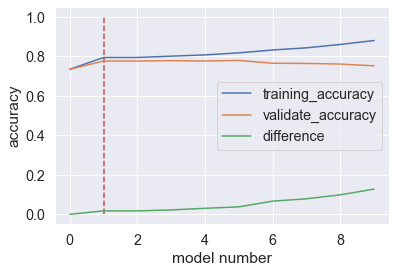

In [33]:
# I selected model #1 because it had the lowest train/val difference of the top 3 performing DTC classifiers
plt.figure(figsize=(12, 9))
sns.set(font_scale = 1.3)
df[['training_accuracy', 'validate_accuracy', 'difference' ]].plot()
plt.ylabel("accuracy")
plt.xlabel("model number")
plt.vlines(x=[1], ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.show()

<div class="alert alert-block alert-success"> 
 <b>Note</b>: I selected model #1 because it had the lowest train/val difference of the top 3 performing DTC classifiers
</div>

### B. Highlight the best model DTC.

In [34]:
# Run the model on the test with Max Depth = 2 (which was the best performing DTC)
best_DTC_model = []

In [35]:
# create the decision tree object with desired hyper-parameters:
clf = DecisionTreeClassifier(max_depth=2)
# fit the decision tree to the training data:
clf = clf.fit(X_train, Y_train)
#make predictions:
churn_prediction = pd.DataFrame(clf.predict(X_train))
# Predict probability
churn_prediction_proba = pd.DataFrame(clf.predict_proba(X_train))
# compute the estimate accuracy
train_set_accuracy = clf.score(X_train, Y_train)
#evaluate on out-of-sample-data
validate_set_accuracy = clf.score(X_validate, Y_validate)   
best_DTC_model.append(
    {'max_depth': 2,
     'training_accuracy': train_set_accuracy,
     'validate_accuracy': validate_set_accuracy,
     'difference': (train_set_accuracy - validate_set_accuracy)}
                    )

In [36]:
best_DTC_df = pd.DataFrame(best_DTC_model)
best_DTC_df

,max_depth,training_accuracy,validate_accuracy,difference
0,2,0.794006,0.776066,0.017939


<div class="alert alert-block alert-warning"> 
    <b>Decision Tree Classifier Takeaways:</b><br>
1. the selected model had the following features:<br>
    a. max depth of 2. <br>
    b. predictive classification accuracy of <b>77.6%</b> on validate (out of sample) data.
</div>

## 2. Random Forest Classifier 

### A. Fit the model and loop through max_depth and min_leaf_samples

In [37]:
# create an empty list to store the dictionaries
max_depth_and_leaf_samples_list = []
# write the for loop to sequentially loop through the values for i,
# setting i as the value, or inverse value, for 
for i in range(1, 16):
    for j in range(1, 16):
        # create the random forest object with desired hyper-parameters:
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf=j)
        # fit the random forest to the training data:
        rf.fit(X_train, Y_train)
        # Evaluate importance, or weight, of each feature.
        rf.feature_importances_
        # Classify each passenger by its estimated survival.
        y_pred = rf.predict(X_train)
        # Estimate the probability of survival, using the training data.
        y_pred_proba = rf.predict_proba(X_train)
        # compute the estimate accuracy
        train_set_accuracy = rf.score(X_train, Y_train)
        #evaluate on out-of-sample-date
        validate_set_accuracy = rf.score(X_validate, Y_validate)
        max_depth_and_leaf_samples_list.append({
                            'max_depth': i,
                            'min_samples_leaf': j,
                            'training_accuracy': train_set_accuracy,
                            'validate_accuracy': validate_set_accuracy,
                            'difference': (train_set_accuracy - validate_set_accuracy)
                                    })

In [38]:
df = pd.DataFrame(max_depth_and_leaf_samples_list)
df.sort_values(['validate_accuracy', 'difference'], ascending = [False, True]).head(3)

,max_depth,min_samples_leaf,training_accuracy,validate_accuracy,difference
163,11,14,0.821438,0.802133,0.019305
169,12,5,0.855728,0.801540,0.054187
113,8,9,0.823470,0.799171,0.024299


<Figure size 1080x720 with 0 Axes>

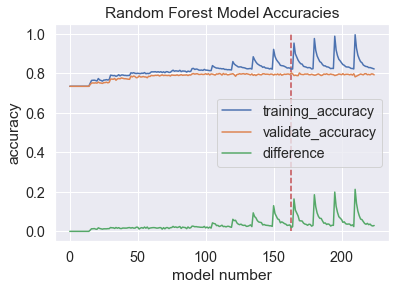

In [52]:
# I selected model #163 because it had the lowest train/val difference of the top 3 performing RFM classifiers
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.3)
df[['training_accuracy', 'validate_accuracy', 'difference' ]].plot()
plt.title("Random Forest Model Accuracies")
plt.ylabel("accuracy")
plt.xlabel("model number")
plt.vlines(x=[163], ymin=0, ymax=1, colors='r', linestyles='dashed')
plt.show()

<div class="alert alert-block alert-success"> 
    <b>Note</b>: I selected model #163 because it had the lowest train/val difference of the top 3 performing RFM classifiers.
</div>

### B. Highlght the best RFC model.

In [40]:
# Run the model on the test with Max Depth = 2 (which was the best performing DTC)
best_RFC_model = []

In [41]:
i = 11
j = 14
# create the random forest object with desired hyper-parameters:
rf = RandomForestClassifier(max_depth=i, min_samples_leaf=j)
# fit the random forest to the training data:
rf.fit(X_train, Y_train)
# Evaluate importance, or weight, of each feature.
rf.feature_importances_
# Classify each passenger by its estimated survival.
y_pred = rf.predict(X_train)
# Estimate the probability of survival, using the training data.
y_pred_proba = rf.predict_proba(X_train)
# compute the estimate accuracy
train_set_accuracy = rf.score(X_train, Y_train)
#evaluate on out-of-sample-data
validate_set_accuracy = rf.score(X_validate, Y_validate)
best_RFC_model.append({
    'max_depth': i,
    'min_samples_leaf': j,
    'training_accuracy': train_set_accuracy,
    'validate_accuracy': validate_set_accuracy,
    'train_val_diff': (train_set_accuracy - validate_set_accuracy)
                    })

In [42]:
best_RFC_df = pd.DataFrame(best_RFC_model)
best_RFC_df

,max_depth,min_samples_leaf,training_accuracy,validate_accuracy,train_val_diff
0,11,14,0.826772,0.795616,0.031156


<div class="alert alert-block alert-warning"> 
    <b>Random Forest Classifier Takeaways:</b>
1. the best performing model had the following features:
    <br>
    a. max depth of 11
    <br>
    b. min_samples_leaf of 14
    <br>
    c. predictive classification accuracy of <b>79.6%</b> on validate (out of sample) data.
</div>

## 3. Logistic Regression Classifier 

### A. Fit the model and loop through C-values

In [43]:
log_regress_outputs = []
i = 1
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=i, random_state=123, intercept_scaling=1, solver='lbfgs')
# Fit the Logistic Regression model
logit.fit(X_train, Y_train)
# Get the predictions from the Logistic Regression Model
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)
# compute the estimate accuracy
train_set_accuracy = logit.score(X_train, Y_train)
#evaluate on out-of-sample-data
validate_set_accuracy = logit.score(X_validate, Y_validate)
log_regress_outputs.append({
                            'c_values': i,
                            'training_accuracy': train_set_accuracy,
                            'validate_accuracy': validate_set_accuracy,
                            'train_val_diff': (train_set_accuracy - validate_set_accuracy)
                                })

In [44]:
df_log_regress = pd.DataFrame(log_regress_outputs)
df_log_regress.sort_values(['validate_accuracy', 'train_val_diff'], ascending = [False, True]).head(3)

,c_values,training_accuracy,validate_accuracy,train_val_diff
0,1,0.803404,0.799171,0.004233


<div class="alert alert-block alert-warning"> 
    <b>Logistic Regression Classifier Takeaways:</b>
    <br>
1. the best performing model had the following features:
    <br>
    a. c_value of 1
    <br>
    b. predictive classification accuracy of <b>79.9%</b> on validate (out of sample) data.
</div>

## 4. Test the most effective model on the Test Dataset

### Let's review the effectiveness of each model:

### 1. Decision Tree Classifier

In [45]:
best_DTC_df

,max_depth,training_accuracy,validate_accuracy,difference
0,2,0.794006,0.776066,0.017939


#### Effectiveness: 77.6%

### 2. Random Forest Classifier

In [46]:
best_RFC_df

,max_depth,min_samples_leaf,training_accuracy,validate_accuracy,train_val_diff
0,11,14,0.826772,0.795616,0.031156


#### Effectiveness: 79.6%

### 3. Logistical Regression Model

In [47]:
df_log_regress.sort_values(['validate_accuracy', 'train_val_diff'], ascending = [False, True]).head(3)

,c_values,training_accuracy,validate_accuracy,train_val_diff
0,1,0.803404,0.799171,0.004233


#### Effectiveness: 79.9%

<div class="alert alert-block alert-warning"> 
    <b>Validation testing Takeaway:</b><br>
    The Logistic Regression Model performed the best on validation data, with <b>79.9% accuracy</b>. Now I will test it on my test data set.
</div>

In [48]:
#evaluate on out-of-sample-data (TEST)
test_set_accuracy = logit.score(X_test, Y_test)
#add to the dataframe for a quick comparison with the validation and train scores:
df_log_regress['test_accuracy'] = test_set_accuracy
df_log_regress['val_test_diff'] = (df_log_regress.validate_accuracy - df_log_regress.test_accuracy)
df_log_regress

,c_values,training_accuracy,validate_accuracy,train_val_diff,test_accuracy,val_test_diff
0,1,0.803404,0.799171,0.004233,0.805259,-0.006089


<div class="alert alert-block alert-warning"> 
    <b>Test set modeling Takeaway:</b>
    <br>
    The Logistic Regression Model has predictive accuracy of <b>80.5%</b> on the out-of-sample (test) data.
</div>

# 4. Key Findings and Recommendations
<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px">

<h2> Key Findings</h2>
<br>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">
1. Payment Type (e-check), Contract Type (monthly), and Internet Service Type (Fiber) are the primary drivers of churn among departing customers.
    <br>
    <br>
2. Model Accuracy: The Logistic Regression Model provided accuracy of <b>80.5%</b> on the out-of-sample (test) data. Given additional time for fine tuning, I would include additional c-values in the LR model to tweak overall accuracy, and run more Chi2 testing to guide some feature engineering.

<h2> Recommendations </h2>
<br>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">

<b> 1. Retain existing high risk-of-churn customers </b>
    5% reduction in price for monthly fiber plans, and any customer identifed with >50% risk of churn
<br>
<b> 2. Convert existing monthly customers into 1- and 2- year customers</b>
    1 free month of service for conversion to 1 yr plans, 2 months for 2 yr plans
<br>
<b> 3. Automate bill pay to eliminate the pain of paying</b>
    10% reduction in monthly bill for 6 months for signing up with valid autopay method of payment

<h3>Predicted outcomes</h3>
<br>
<hr style="border-top: 5px groove limegreen; margin-top: 1px; margin-bottom: 1px">

<b> 1. Retain 50% more customers through the crucial first 6 months</b>
<br>
    +900-1100 customers no longer churning
<br>
<b> 2. Cut lost revenue by 33%, customer acquisition by 50%</b>
<br>
    CA down to 280k, from 560k annually
<br>
<b> 3. Loss leader promos will result in lost revenue, but retain customers in the long term</b>
<br>
    $33k/QTR + $272k + $114k  = $419k over 2 QTRs
<br>

#### Produce Predictions CSV
- the predictions CSV provides churn predictions for every customer in the train set. Using the predictions will allow TELCO's marketing and customer retention departments to dynamically engage high risk-of-churn customers in order to stem customer erosion.

In [49]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

predictions = pd.DataFrame({
    "customer_id": test.customer_id, # since the customer_id is dropped from X_test, we'll use test here since the indexes line up
    "prediction": y_pred,
    "probability_of_churn": y_pred_proba[:,1] #yields only the churn probability, not the non-churn probabilities
})

predictions.to_csv("predictions.csv")